<a href="https://colab.research.google.com/github/alexrafkin/play_store_analysis/blob/main/AppStoreAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

As something we interact with everyday, the app market is a direct reflection of our needs and inclinations. Whether you are a tech company which wants to develop a new app, or just trying to tap into which way the app market is trending, analyzing Google Play Store data is a great place to start.

In this project, I am tackling a data set which catalogues over 10,000 apps on the Google Play Store. For each app, the dataset has information on the name, category, overall rating, number of reviews, install count range, size of the app, the cost of the app, the content rating, the genre, the last time it was updated, current version, and android compatibility.


There are certainly groups of apps which do better than others, but which are they? To what extent are they beating their competitors? My main goal in this project is to assess app success depending on a few varying factors: Category, Content Rating, and App Type (free or paid). I plan on using four main indicators of success: Overall Rating, Reviews, Installs, and a ratio of Reviews per Install, which I will call RPI. I believe that by doing this analysis, I will find a particular app Category, Content Rating, and Type which statistically stands out in terms of its success.

# Null and Alternate Hypotheses

*H$_{_0}$*: For ratings, reviews, installs, and RPI, there are no app categories, content ratings, or types which succeed a statistically significant amount more than all other apps.

*H$_{_A}$*: For ratings, reviews, installs, and RPI, there is a particular app category, content rating, and type which succeeds a statistically significant amount more than all other apps.

# Accessing and Cleaning the Data

In [ ]:
import math
import random
import statistics
import pandas as pd
import numpy as np
from scipy import stats
import scipy
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
import warnings
warnings.filterwarnings("ignore")

url = 'https://drive.google.com/file/d/19NY7Pgc9hH9Z69GpIvHySd1YrFj9i7We/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
apps = pd.read_csv(path)
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
print(apps.iloc[10472])
print(len(apps))
apps = apps.drop(index=apps.index[10472])
print(apps.iloc[10472])
print(len(apps))

#This is to get rid of one app with errors in the data.

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object
10841
App               osmino Wi-Fi: free WiFi
Category                            TOOLS
Rating                                4.2
Reviews                            134203
Size                                 4.1M
Ins

In [ ]:
apps = apps.drop(['Last Updated', 'Current Ver', 'Android Ver', 'Size', 'Genres','Price'], axis=1)
apps.head()

#Getting rid of the data we don't need to use for our analysis

,App,Category,Rating,Reviews,Installs,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,Everyone


In [ ]:
apps = apps.dropna()
apps.info()

#There are a lot of missing rating inputs, we want to make sure that doesn't skew the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Installs        9366 non-null   object 
 5   Type            9366 non-null   object 
 6   Content Rating  9366 non-null   object 
dtypes: float64(1), object(6)
memory usage: 585.4+ KB


In [ ]:
def fix_installs(string):
  num_only = filter(str.isdigit, string)
  installs = int("".join(num_only))
  return installs
  
for index in apps.index:
  apps.loc[index,'Installs'] = fix_installs(apps.loc[index,'Installs'])

apps.head()
#This is to fix the install count, rounding down to the minimum of its inital range and turning it into an int rather than a string

,App,Category,Rating,Reviews,Installs,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,Everyone


In [ ]:
for index in apps.index:
  apps.loc[index,'Reviews'] = int(apps.loc[index,'Reviews'])
  apps.loc[index,'R'] = apps.loc[index,'Reviews']
  apps.loc[index,'I'] = apps.loc[index,'Installs']
  apps.loc[index,'RPI'] = (apps.loc[index,'Reviews'])/apps.loc[index, 'Installs']
  
apps = apps.drop(['Reviews', 'Installs'], axis=1)
apps = apps.rename(columns={'R': 'Reviews', 'I': 'Installs'})
apps = apps[['App', 'Category', 'Content Rating', 'Type', 'Rating', 'Reviews', 'Installs', 'RPI']]
apps.head()

#This creates the RPI column, as well as fixing making Reviews and Installs workable floats.

,App,Category,Content Rating,Type,Rating,Reviews,Installs,RPI
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Everyone,Free,4.1,159.0,10000.0,0.015900
1,Coloring book moana,ART_AND_DESIGN,Everyone,Free,3.9,967.0,500000.0,0.001934
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Everyone,Free,4.7,87510.0,5000000.0,0.017502
3,Sketch - Draw & Paint,ART_AND_DESIGN,Teen,Free,4.5,215644.0,50000000.0,0.004313
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Everyone,Free,4.3,967.0,100000.0,0.009670


# Acknowledging Potential Bias

In this dataset, the values for Reviews, Installs, and RPI are incredibly variable. This would make sense, since there are a ton of apps which get very little to no engagement, a handful of apps which hundreds of millions of people use every single day, and then the majority of apps, which lie somewhere between those two subsets. For example, the 'GAME' category will have games like 'Fruit Ninja' or 'Subway Surfers' which might have millions of downloads and reviews, which would pull the 'GAME' category's average installs and reviews.

Another source of potential bias is that installs were only reported in ranges. These ranges went from 1-4, 5-9, 10-49, 50-99, 100-499, 500-999, 1000-4999, etc. In the lower ranges, this matters a lot less as the possible error is much smaller. However, with some apps having over a billion installs, the differences between 500 million and 999 million, or 100 and 499 million can add up.

This bias will certainly show up in the following analysis, but it is still a fairly accurate representation of the app market.

# Defining Success and Effect Size

We are defining success by four main indicators: Rating, Number of Reviews, Installs, and Reviews per Install. Rating would seem to be a pretty direct indicator of app success - as it shows how much the app users like the app. However, it has no information about the amount of users that app has. As we will see in the analysis below, some apps may have higher ratings, but don't do as well in regard to the other success indicators. Reviews and Installs are fairly straightforward - the more installs you have, the more people are downloading (and probably interacting with) your app. Reviews are a clearer indication of interaction, as people tend to review apps which they use frequently, as reviews are either prompted by the app or people are driven to review the app by their own volition. While number of Reviews and Installs is certainly correlated, some apps may tend to regularly garner more reviews on average. Reviews per install is a representation of how likely a person who installed the app is to review it. In a way this is a measurement of how invested people are in the app - given that it takes more effort and intention to write a review. In this analysis we will find out if the best performing categories, content ratings, and app type for each indicator (on average) are perfoming significantly better than the other categories.

After using the testing for significance, if the tests express that there is a statistically significant difference between the best performing group and the others, then I will attempt to measure the effect size. If the distributions have proven to be normally distributed by skew, kurtosis, and the Shapiro-Wilk test, I will find a 95% confidence interval in the difference of means. If the distributions have proven to be non-normally distributed, I will randomly sample each group 5000 times, and plot those samples against each other then I will have an average difference of the sampled data, and will use that to estimate the effect size.

# Assessing App Success by Category

## Identifying Different Categories

In [ ]:
for i in range(len(apps['Category'].unique())):
  print(i+1,"-", apps['Category'].unique()[i])

1 - ART_AND_DESIGN
2 - AUTO_AND_VEHICLES
3 - BEAUTY
4 - BOOKS_AND_REFERENCE
5 - BUSINESS
6 - COMICS
7 - COMMUNICATION
8 - DATING
9 - EDUCATION
10 - ENTERTAINMENT
11 - EVENTS
12 - FINANCE
13 - FOOD_AND_DRINK
14 - HEALTH_AND_FITNESS
15 - HOUSE_AND_HOME
16 - LIBRARIES_AND_DEMO
17 - LIFESTYLE
18 - GAME
19 - FAMILY
20 - MEDICAL
21 - SOCIAL
22 - SHOPPING
23 - PHOTOGRAPHY
24 - SPORTS
25 - TRAVEL_AND_LOCAL
26 - TOOLS
27 - PERSONALIZATION
28 - PRODUCTIVITY
29 - PARENTING
30 - WEATHER
31 - VIDEO_PLAYERS
32 - NEWS_AND_MAGAZINES
33 - MAPS_AND_NAVIGATION


We can see that there are 33 different categories of apps, now we need to check how many of each category there are. We should check to make sure that there are enough in each category to be statistically viable for analysis.

In [ ]:
apps.groupby(['Category']).agg(['count'])

,App,Content Rating,Type,Rating,Reviews,Installs,RPI
,count,count,count,count,count,count,count
Category,,,,,,,
ART_AND_DESIGN,62,62,62,62,62,62,62
AUTO_AND_VEHICLES,73,73,73,73,73,73,73
BEAUTY,42,42,42,42,42,42,42
BOOKS_AND_REFERENCE,178,178,178,178,178,178,178
BUSINESS,303,303,303,303,303,303,303
COMICS,58,58,58,58,58,58,58
COMMUNICATION,328,328,328,328,328,328,328
DATING,195,195,195,195,195,195,195


We can see there are enough instances in each category to be statistically valid for analysis.

## Identifying and Testing Best Performing App Category: Rating

In [ ]:
avgs = apps.groupby(['Category']).mean()
avgs.sort_values(by = 'Rating', ascending = False).head(5)

,Rating,Reviews,Installs,RPI
Category,,,,
EVENTS,4.435556,3568.666667,3.544313e+05,0.030471
EDUCATION,4.389032,255451.677419,5.621626e+06,0.031566
ART_AND_DESIGN,4.358065,27651.161290,2.003760e+06,0.020311
BOOKS_AND_REFERENCE,4.346067,123363.258427,1.079377e+07,0.032065
PERSONALIZATION,4.335987,284540.812102,7.405583e+06,0.041123


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

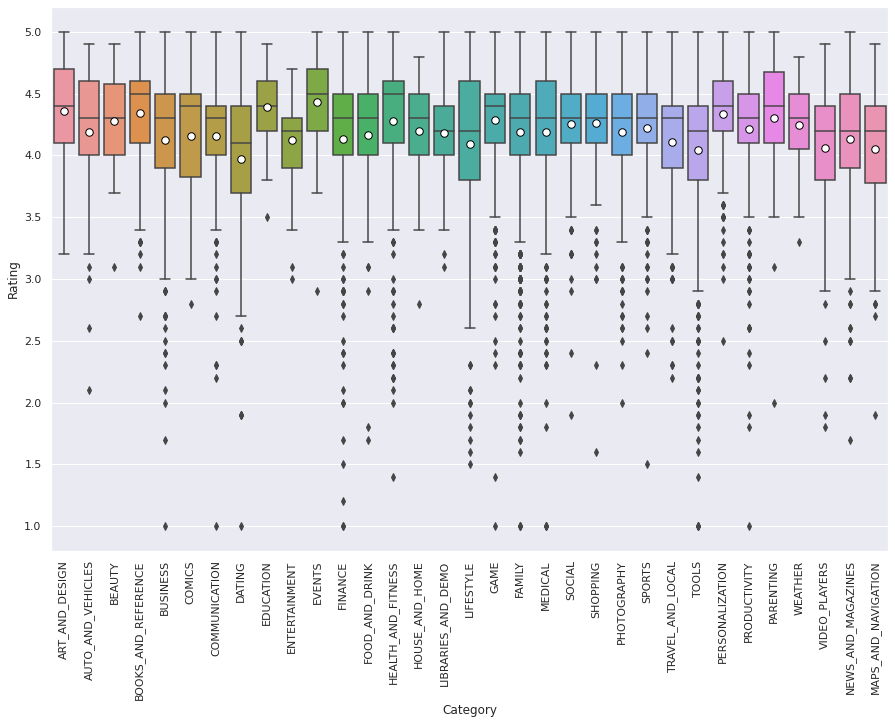

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(y="Rating", x="Category", data=apps, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7.5"})
plt.xticks(rotation=90)

Here we have the boxplots of all the categories' ratings. The white circle shows where the mean for each category is. We can see in the plot, as well as in the chart above, that the Events category has the highest average rating.

In [ ]:
apps_events = apps.copy(deep=True)

for index in apps_events.index:
  if apps_events.loc[index, 'Category'] != 'EVENTS':
    apps_events.loc[index,'Category'] = 'NOT EVENTS'
apps_events.groupby(['Category']).agg(['count'])

,App,Content Rating,Type,Rating,Reviews,Installs,RPI
,count,count,count,count,count,count,count
Category,,,,,,,
EVENTS,45,45,45,45,45,45,45
NOT EVENTS,9321,9321,9321,9321,9321,9321,9321


Since we have identified the Events category as the highest rated category on average, we now split the data into the Events category and the other apps to check for significance.

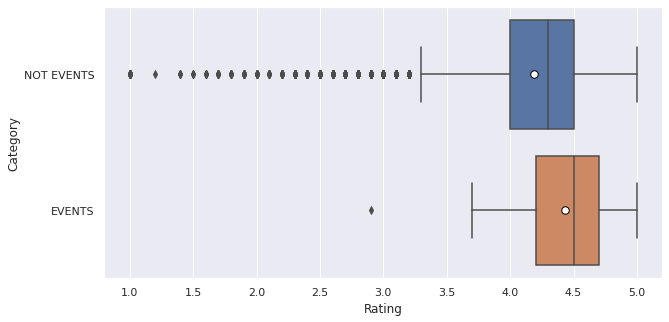

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Rating", y="Category", data=apps_events, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7.5"})

Here we can see two representations of the Events vs. Non-Events apps. 

Above we have the boxplots showing events being more concentrated in the higher ratings, with the white dot again showing the mean value.

Below we can see a distribution plot for both groups. We can see that the Events category peaks at a higher rating.

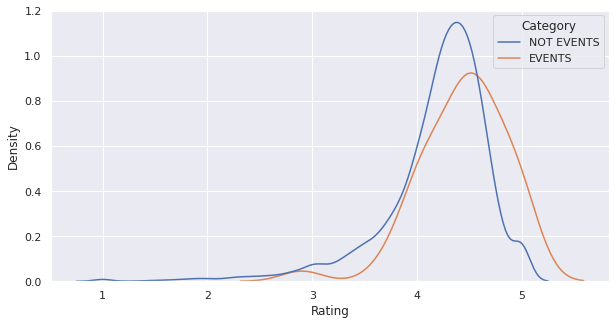

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=apps_events, x="Rating", hue='Category', common_norm=False)

In [ ]:
events = apps[apps['Category'] == 'EVENTS']
not_events = apps[apps['Category'] != 'EVENTS']

Now we need to test to see if these two groups are normally distributed.

In [ ]:
print('The events rating distribution has skewness of {}, and kurtosis of {}'.format(stats.describe(events['Rating'])[-2],stats.describe(events['Rating'])[-1]))
print('The non-events rating distribution has skewness of {}, and kurtosis of {}'.format(stats.describe(not_events['Rating'])[-2],stats.describe(not_events['Rating'])[-1]))

The events rating distribution has skewness of -1.057914544127723, and kurtosis of 2.239807488835133
The non-events rating distribution has skewness of -1.8520587496214815, and kurtosis of 5.787839940533557


The non-events rating distribution has a kurtosis which is outside of the accepted range for normality.

In [ ]:
print(stats.shapiro(events['Rating']))
print(stats.shapiro(not_events['Rating']))

(0.9196527004241943, 0.004114943090826273)
(0.8627778887748718, 0.0)


We can see that both distributions are non-normal, since both failed the Shapiro-Wilk test, therefore we can't use a regular t-test. Let's use the Kruskal-Wallis test instead.

In [ ]:
stats.kruskal(events['Rating'], not_events['Rating'])

KruskalResult(statistic=11.923616091802172, pvalue=0.0005542678688447767)

Our p-value is <0.05, and so we can confirm that there is a statistically significant difference in the ratings for the events category.

Now, to get a better and cleaner understanding of the average difference, we will randomly sample the above distributions and use the central limit theorem to nudge them towards normality, to focus in on the mean value.

In [ ]:
def sample(n, df1, df2, indicator, col1, col2):
  results_a = []
  trials_a = []
  results_b = []
  trials_b = []

  for i in range(1,n+1):
    trial = df1.iloc[random.randint(0, len(df1)-1)][indicator]
    trials_a.append(trial)
    running_avg_a = statistics.mean(trials_a)
    results_a.append(running_avg_a)
    trial = df2.iloc[random.randint(0, len(df2)-1)][indicator]
    trials_b.append(trial)
    running_avg_b = statistics.mean(trials_b)
    results_b.append(running_avg_b)

  sample_df = pd.DataFrame({col1 : results_a, col2 : results_b})
  return sample_df

# This creates a sampling function which we can use whenever we are trying to re-assess the mean of non-normal distributions.

In [ ]:
def sample_replot(df):
  avg_a = df.iloc[-1][0]
  avg_b = df.iloc[-1][1]
  sns.kdeplot(data=df)
  plt.axvline(avg_a, 0,5000)
  plt.axvline(avg_b, 0,5000, color='orange')
# This will plot the distribution of the sample, with a line throught the average values.

<Figure size 720x360 with 0 Axes>

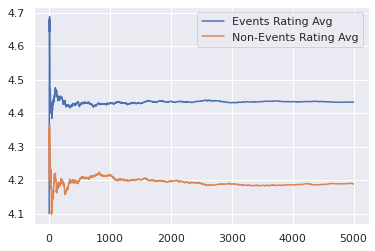

In [ ]:
cat_rating = sample(5000, events, not_events, 'Rating', 'Events Rating Avg', 'Non-Events Rating Avg')
plt.figure(figsize=(10,5))
cat_rating.plot()

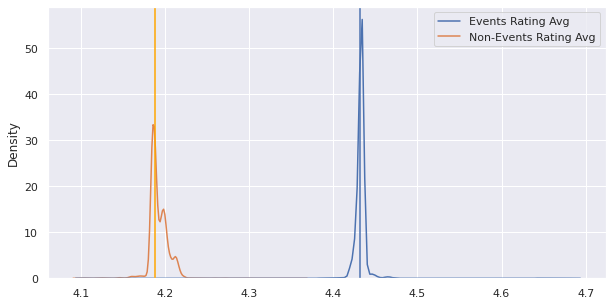

In [ ]:
plt.figure(figsize=(10,5))
sample_replot(cat_rating)

In [ ]:
print('After randomly sampling 5000 times, the average difference between the two groups is {}'.format(cat_rating.iloc[-1][0] - cat_rating.iloc[-1][1]))

After randomly sampling 5000 times, the average difference between the two groups is 0.24359999999999982


In [ ]:
cat_rat_dif = cat_rating.iloc[-1][0] - cat_rating.iloc[-1][1]
cat_rat_val = round((cat_rat_dif/cat_rating.iloc[-1][0])*100,2)

In [ ]:
print("We have found that average Events app tend to be rated {} stars higher than the average non-Events app. Events apps are rated {}% higher than other apps.".format(round(cat_rat_dif, 3), cat_rat_val))

We have found that average Events app tend to be rated 0.244 stars higher than the average non-Events app. Events apps are rated 5.5% higher than other apps.


For each of the other success measures, we will go through a similar process to determine the effect size of each difference. We will also do this for Content Ratings and App Types.

## Identifying and Testing Best Performing App Categories: Reviews

In [ ]:
avgs.sort_values(by = 'Reviews', ascending = False).head(5)

,Rating,Reviews,Installs,RPI
Category,,,,
COMMUNICATION,4.158537,2.486164e+06,9.953427e+07,0.033323
SOCIAL,4.255598,2.398614e+06,5.432371e+07,0.053427
GAME,4.286326,1.445232e+06,3.198347e+07,0.056972
VIDEO_PLAYERS,4.063750,6.898731e+05,3.888686e+07,0.029706
PHOTOGRAPHY,4.192114,6.735540e+05,3.182411e+07,0.027614


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

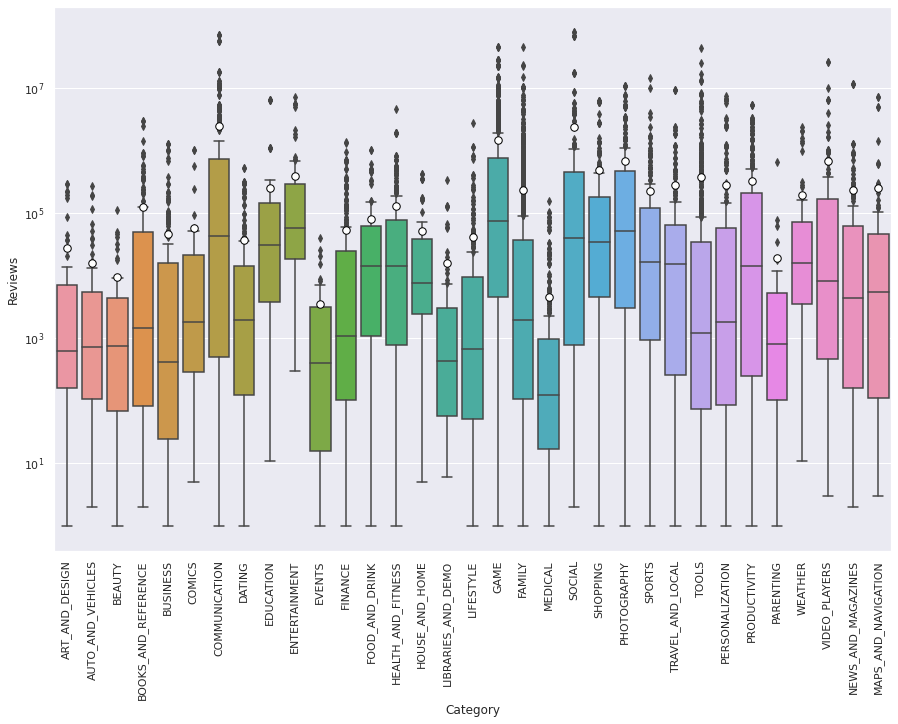

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(y="Reviews", x="Category", data=apps, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7.5"})
plt.yscale('log')
plt.xticks(rotation=90)

We can see that the Communication category has the highest average number of reviews.

In [ ]:
apps_comm = apps.copy(deep=True)

for index in apps_comm.index:
  if apps_comm.loc[index, 'Category'] != 'COMMUNICATION':
    apps_comm.loc[index, 'Category'] = 'NOT COMMUNICATION'
apps_comm.groupby(['Category']).agg(['count'])

,App,Content Rating,Type,Rating,Reviews,Installs,RPI
,count,count,count,count,count,count,count
Category,,,,,,,
COMMUNICATION,328,328,328,328,328,328,328
NOT COMMUNICATION,9038,9038,9038,9038,9038,9038,9038


Both groups have enough data, we can continue.

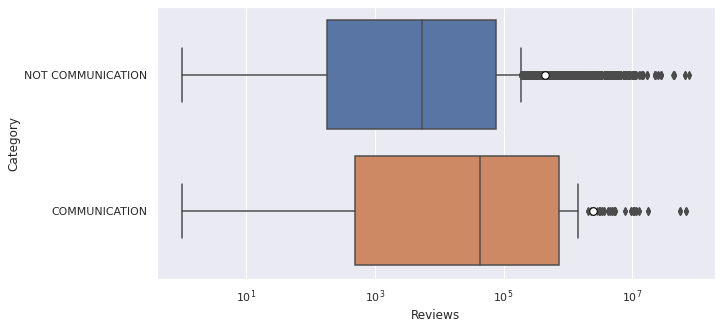

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Reviews', y="Category", data=apps_comm, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7.5"})
plt.xscale('log')

We can see that while both distributions are fairly variable, Communication apps have a higher average Review count.

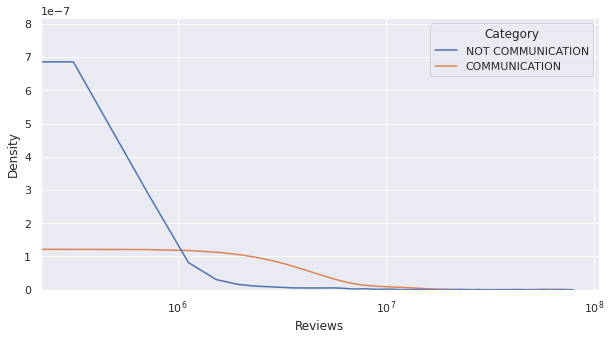

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=apps_comm, x='Reviews', hue = 'Category', common_norm=False)
plt.xscale('log')

Note: Since the x-axis is set to a logarithmic scale, it may seem like the probability densities aren't equal. However, the x-scale gets denser as you move right on the graph, and evens out the probability densities. This applies to all other non-rating distributions.

In [ ]:
comm = apps[apps['Category'] == 'COMMUNICATION']
not_comm = apps[apps['Category'] != 'COMMUNICATION']

Now we can test for normality, but it doesnt seem like these distributions will be normal.

In [ ]:
print('The communication reviews distribution has skewness of {}, and kurtosis of {}'.format(stats.describe(comm['Reviews'])[-2],stats.describe(comm['Reviews'])[-1]))
print('The non-communication reviews distribution has skewness of {}, and kurtosis of {}'.format(stats.describe(not_comm['Reviews'])[-2],stats.describe(not_comm['Reviews'])[-1]))

The communication reviews distribution has skewness of 6.11625937558819, and kurtosis of 39.70572773251791
The non-communication reviews distribution has skewness of 16.568860835934515, and kurtosis of 367.41410908875406


In [ ]:
print(stats.shapiro(comm['Reviews']))
print(stats.shapiro(not_comm['Reviews']))

(0.28630173206329346, 1.2239170957299846e-33)
(0.1377582550048828, 0.0)


Both reviews distributions have a skew and kurtosis which are outside of the accepted range for normality. Both failed the Shapiro-Wilk test as well, so we can't use a regular t-test. Instead, we will use the Kruskal-Wallis test.

In [ ]:
stats.kruskal(comm['Reviews'], not_comm['Reviews'])

KruskalResult(statistic=55.68066609200533, pvalue=8.5252613980522e-14)

Our p-value is <0.05, and so we can confirm that there is a statistically significant difference in the reviews for the communication category.

In [ ]:
cat_reviews = sample(5000, comm, not_comm, 'Reviews', 'Communication Reviews Avg', 'Non-Communications Reviews Avg')
plt.figure(figsize=(10,5))
cat_reviews.plot()

In [ ]:
plt.figure(figsize=(10,5))
sample_replot(cat_reviews)

In [ ]:
print('After randomly sampling 5000 times, the average difference between the two groups is is {}'.format(round(cat_reviews.iloc[-1][0] - cat_reviews.iloc[-1][1])))

This tells us that the average Communication app has, on average, around 2 million more reviews than other apps. This seems like a huge difference - and it is. It seems like the incredibly popular Communication apps, such as Facebook Messenger, WhatsApp and others really pulled the average number of reviews up.

## Identifying and Testing Best Performing App Categories: Installs

In [ ]:
avgs.sort_values(by = 'Installs', ascending = False).head(5)

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(y ="Installs", x="Category", data=apps, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7.5"})
plt.yscale('log')
plt.xticks(rotation=90)

We can see that the Communication category has the highest average number of reviews.

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Installs', y="Category", data=apps_comm, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7.5"})
plt.xscale('log')

Again we can see the distributions for Communication vs. non-Communication apps, but this time for Install count.

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=apps_comm, x='Installs', hue = 'Category', common_norm=False)
plt.xscale('log')

In [ ]:
print('The communication reviews distribution has skewness of {}, and kurtosis of {}'.format(stats.describe(comm['Installs'])[-2],stats.describe(comm['Installs'])[-1]))
print('The non-communication reviews distribution has skewness of {}, and kurtosis of {}'.format(stats.describe(not_comm['Installs'])[-2],stats.describe(not_comm['Installs'])[-1]))

In [ ]:
print(stats.shapiro(comm['Installs']))
print(stats.shapiro(not_comm['Installs']))

Non-communication app installs has a skew outside of normal range and both installs distributions have kurtosis which is outside of the accepted range for normality. Both failed the Shapiro-Wilk test as well, so we can't use a regular t-test.

In [ ]:
stats.kruskal(comm['Installs'], not_comm['Installs'])

Our p-value is <0.05, and so we can confirm that there is a statistically significant difference in the installs for the communication category.

In [ ]:
cat_installs = sample(5000, comm, not_comm, 'Installs', 'Communication Installs Avg', 'Non-Communications Installs Avg')
plt.figure(figsize=(10,5))
cat_installs.plot()

In [ ]:
plt.figure(figsize=(10,5))
sample_replot(cat_installs)

In [ ]:
print('After randomly sampling 5000 times, the average difference between the two groups is {}'.format(round(cat_installs.iloc[-1][0] - cat_installs.iloc[-1][1])))

Again, we find a huge difference between the two groups, most likely caused by the massive outlier apps like Facebook Messenger and WhatsApp.

## Identifying and Testing Best Performing App Categories: RPI

In [ ]:
avgs.sort_values(by = 'RPI', ascending = False).head(5)

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(y="RPI", x="Category", data=apps, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7.5"})
plt.yscale('log')
plt.xticks(rotation=90)

We can see that the Game category has the highest average RPI.

In [ ]:
apps_games = apps.copy(deep=True)

for index in apps_games.index:
  if apps_games.loc[index, 'Category'] != 'GAME':
    apps_games.loc[index, 'Category'] = 'NOT GAME'
apps_games.groupby(['Category']).agg(['count'])

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='RPI', y="Category", data=apps_games, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7.5"})
plt.xscale('log')

Again, we can see the distributions above and below.

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=apps_games, x='RPI', hue = 'Category', common_norm=False)
plt.xscale('log')

In [ ]:
game = apps[apps['Category'] == 'GAME']
not_game = apps[apps['Category'] != 'GAME']

In [ ]:
print('The game RPI distribution has skewness of {}, and kurtosis of {}'.format(stats.describe(game['RPI'])[-2],stats.describe(game['RPI'])[-1]))
print('The non-game RPI distribution has skewness of {}, and kurtosis of {}'.format(stats.describe(not_game['RPI'])[-2],stats.describe(not_game['RPI'])[-1]))

In [ ]:
print(stats.shapiro(game['RPI']))
print(stats.shapiro(not_game['RPI']))

Both rating distributions have a skew and kurtosis which are outside of the accepted range for normality. Both failed the Shapiro-Wilk test as well, so we can't use a regular t-test.

In [ ]:
stats.kruskal(game['RPI'], not_game['RPI'])

Our p-value is <0.05, and so we can confirm that there is a statistically significant difference in the reviews for the communication category.

In [ ]:
cat_RPI = sample(5000, game, not_game, 'RPI', 'Game RPI Avg', 'Non-Game RPI Avg')
plt.figure(figsize=(10,5))
cat_RPI.plot()

In [ ]:
plt.figure(figsize=(10,5))
sample_replot(cat_RPI)

In [ ]:
print('After randomly sampling 5000 times, the average difference between the two groups is {}'.format(cat_RPI.iloc[-1][0] - cat_RPI.iloc[-1][1]))

In [ ]:
cat_RPI_dif = cat_RPI.iloc[-1][0] - cat_RPI.iloc[-1][1]
cat_RPI_val = round((cat_RPI_dif/cat_RPI.iloc[-1][1])*100,2)

In [ ]:
print('While that number might not make sense on its own, this means that each installer of a Gaming app was {}% more likely to write a review.'.format(cat_RPI_val))

# Assessing App Success by Content Rating


## Identifying Different Content Ratings

In [ ]:
for i in range(len(apps['Content Rating'].unique())):
  print(i+1,"-", apps['Content Rating'].unique()[i])

In [ ]:
apps.groupby(['Content Rating']).agg(['count'])

Unrated Apps and 18+ Apps have too few instances to show conclusive data, and therefore we need to drop them.

In [ ]:
cr = apps[apps['Content Rating'] != 'Unrated']
cr = cr[cr['Content Rating'] != 'Adults only 18+']
cr.groupby(['Content Rating']).agg(['count'])

In [ ]:
cr_avgs = cr.groupby(['Content Rating']).mean()
cr_avgs

We can see that apps with the 'Everyone 10+' content rating performs the best in all success indicators.

## Identifying and Testing Best Performing App Content Ratings: Rating

In [ ]:
for index in cr.index:
  if cr.loc[index, 'Content Rating'] != 'Everyone 10+':
    cr.loc[index,'Content Rating'] = 'Not Everyone 10+'
cr.groupby(['Content Rating']).agg(['count'])

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(y="Content Rating", x="Rating", data=cr, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7.5"})

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=cr, x="Rating", hue = 'Content Rating', common_norm=False)

This seems like the data is fairly consistent between the two groups.

In [ ]:
e_10 = cr[cr['Content Rating'] == 'Everyone 10+']
not_e_10 = cr[cr['Content Rating'] != 'Everyone 10+']

In [ ]:
print('The \'Everyone 10+\' rating distribution has skewness of {}, and kurtosis of {}'.format(stats.describe(e_10['Rating'])[-2],stats.describe(e_10['Rating'])[-1]))
print('The rating distribution for the other content ratings has skewness of {}, and kurtosis of {}'.format(stats.describe(not_e_10['Rating'])[-2],stats.describe(not_e_10['Rating'])[-1]))

These both have kurtosis outside of the acceptable range for normality.

In [ ]:
print(stats.shapiro(e_10['Rating']))
print(stats.shapiro(not_e_10['Rating']))

We can see that both distributions are non-normal, since both failed the Shapiro-Wilk test, therefore we can't use a regular t-test.

In [ ]:
stats.kruskal(e_10['Rating'], not_e_10['Rating'])

The p-value is higher than our set 0.05, and therefore there isn't a statistically significant rating difference between Everyone 10+ apps and others.

## Identifying and Testing Best Performing App Content Ratings: Reviews

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(y='Content Rating', x="Reviews", data=cr, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7.5"})
plt.xscale('log')

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=cr, x='Reviews', hue = 'Content Rating', common_norm=False)
plt.xscale('log')

In [ ]:
print('The \'Everyone 10+\' reviews distribution has skewness of {}, and kurtosis of {}'.format(stats.describe(e_10['Reviews'])[-2],stats.describe(e_10['Reviews'])[-1]))
print('The reviews distribution for the other content ratings has skewness of {}, and kurtosis of {}'.format(stats.describe(not_e_10['Reviews'])[-2],stats.describe(not_e_10['Reviews'])[-1]))

In [ ]:
print(stats.shapiro(e_10['Reviews']))
print(stats.shapiro(not_e_10['Reviews']))

Both reviews distributions have a skew and kurtosis which are outside of the accepted range for normality. Both failed the Shapiro-Wilk test as well, so we can't use a regular t-test.

In [ ]:
stats.kruskal(e_10['Reviews'], not_e_10['Reviews'])

Our p-value is <0.05, and so we can confirm that there is a statistically significant difference in the reviews for the "Everyone 10+' content rating.

In [ ]:
cr_reviews = sample(5000, e_10, not_e_10, 'Reviews', 'Everyone 10+ Reviews Avg', 'Other Content Rating Reviews Avg')
plt.figure(figsize=(10,5))
cr_reviews.plot()

In [ ]:
plt.figure(figsize=(10,5))
sample_replot(cr_reviews)

In [ ]:
print('After randomly sampling 5000 times, the average difference between the two groups is {}'.format(round(cr_reviews.iloc[-1][0] - cr_reviews.iloc[-1][1])))

## Identifying and Testing Best Performing App Content Ratings: Installs

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(y='Content Rating', x="Installs", data=cr, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7.5"})
plt.xscale('log')

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=cr, x='Installs', hue = 'Content Rating', common_norm=False)
plt.xscale('log')

In [ ]:
print('The \'Everyone 10+\' installs distribution has skewness of {}, and kurtosis of {}'.format(stats.describe(e_10['Installs'])[-2],stats.describe(e_10['Installs'])[-1]))
print('The installs distribution for the other content ratings has skewness of {}, and kurtosis of {}'.format(stats.describe(not_e_10['Installs'])[-2],stats.describe(not_e_10['Installs'])[-1]))

In [ ]:
print(stats.shapiro(e_10['Installs']))
print(stats.shapiro(not_e_10['Installs']))

Both reviews distributions have a skew and kurtosis which are outside of the accepted range for normality. Both failed the Shapiro-Wilk test as well, so we can't use a regular t-test.

In [ ]:
stats.kruskal(e_10['Installs'], not_e_10['Installs'])

Our p-value is <0.05, and so we can confirm that there is a statistically significant difference in the installs for the "Everyone 10+' content rating.

In [ ]:
cr_installs = sample(5000, e_10, not_e_10, 'Reviews', 'Everyone 10+ Installs Avg', 'Other Content Rating Installs Avg')
plt.figure(figsize=(10,5))
cr_installs.plot()

In [ ]:
plt.figure(figsize=(10,5))
sample_replot(cr_installs)

In [ ]:
print('After randomly sampling 5000 times, the average difference between the two groups is {}'.format(round(cr_installs.iloc[-1][0] - cr_installs.iloc[-1][1])))

## Identifying and Testing Best Performing App Content Ratings: RPI

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(y='Content Rating', x="RPI", data=cr, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7.5"})
plt.xscale('log')

Here are the distributions of Everyone 10+ vs. Other Content Ratings for RPI.

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=cr, x="RPI", hue = 'Content Rating', common_norm=False)
plt.xscale('log')

In [ ]:
print('The \'Everyone 10+\' RPI distribution has skewness of {}, and kurtosis of {}'.format(stats.describe(e_10['RPI'])[-2],stats.describe(e_10['RPI'])[-1]))
print('The RPI distribution for the other content ratings has skewness of {}, and kurtosis of {}'.format(stats.describe(not_e_10['RPI'])[-2],stats.describe(not_e_10['RPI'])[-1]))

In [ ]:
print(stats.shapiro(e_10['RPI']))
print(stats.shapiro(not_e_10['RPI']))

Both reviews distributions have a skew and kurtosis which are outside of the accepted range for normality. Both failed the Shapiro-Wilk test as well, so we can't use a regular t-test.

In [ ]:
stats.kruskal(e_10['RPI'], not_e_10['RPI'])

Our p-value is <0.05, and so we can confirm that there is a statistically significant difference in the RPI for the "Everyone 10+' content rating.

In [ ]:
cr_RPI = sample(5000, e_10, not_e_10, 'RPI', 'Everyone 10+ RPI Avg', 'Other Content Rating RPI Avg')
plt.figure(figsize=(10,5))
cr_RPI.plot()

In [ ]:
plt.figure(figsize=(10,5))
sample_replot(cr_RPI)

In [ ]:
print('After randomly sampling 5000 times, the average difference between the two groups is {}'.format(cr_RPI.iloc[-1][0] - cr_RPI.iloc[-1][1]))

In [ ]:
print(cr_RPI.iloc[-1][0])
print(cr_RPI.iloc[-1][1])

In [ ]:
cr_RPI_dif = cr_RPI.iloc[-1][0] - cr_RPI.iloc[-1][1]
cr_RPI_val = round((cr_RPI_dif/cr_RPI.iloc[-1][1])*100,2)

In [ ]:
print('While that number might not make sense on its own, this means that each installer of a Everyone 10+ app was {}% more likely to write a review.'.format(cr_RPI_val))

# Assessing App Success by App Type: Free vs. Paid

In [ ]:
for i in range(len(apps['Type'].unique())):
  print(i+1,"-", apps['Type'].unique()[i])

In [ ]:
apps.groupby(['Type']).agg(['count'])

No cleaning necessary here, there are enough instances in each group.

In [ ]:
apps.groupby(['Type']).agg(['mean'])

## Identifying and Testing Best Performing App Type: Rating

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Rating", y="Type", data=apps, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7.5"})

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=apps, x="Rating", hue='Type', common_norm=False)

In [ ]:
free = apps[apps['Type'] == 'Free']
paid = apps[apps['Type'] == 'Paid']

In [ ]:
print('The free app rating distribution has skewness of {}, and kurtosis of {}'.format(stats.describe(free['Rating'])[-2],stats.describe(free['Rating'])[-1]))
print('The paid app rating distribution has skewness of {}, and kurtosis of {}'.format(stats.describe(paid['Rating'])[-2],stats.describe(paid['Rating'])[-1]))

These both have kurtosis outside of the acceptable range for normality.

In [ ]:
print(stats.shapiro(free['Rating']))
print(stats.shapiro(paid['Rating']))

We can see that both distributions are non-normal, since both failed the Shapiro-Wilk test, therefore we can't use a regular t-test.

In [ ]:
stats.kruskal(free['Rating'], paid['Rating'])

Here we can see the p-value is <0.05, and therefore there is a statistically significant difference in the ratings of free vs. paid apps.

In [ ]:
t_rat = sample(5000, free, paid, 'Rating', 'Free Ratings Avg', 'Paid Ratings Avg')
plt.figure(figsize=(10,5))
t_rat.plot()

In [ ]:
plt.figure(figsize=(10,5))
sample_replot(t_rat)

In [ ]:
print('After randomly sampling 5000 times, the average difference between the two groups is {}'.format(t_rat.iloc[-1][1] - t_rat.iloc[-1][0]))

In [ ]:
t_rat_dif = t_rat.iloc[-1][1] - t_rat.iloc[-1][0]
t_rat_val = round((t_rat_dif/t_rat.iloc[-1][0])*100,2)

In [ ]:
print("We have found that average Paid app tend to be rated {} stars higher than the average Free app. Paid apps rate {}% higher.".format(round(t_rat_dif,3), t_rat_val))

## Identifying and Testing Best Performing App Type: Reviews

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Reviews', y="Type", data=apps, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7.5"})
plt.xscale('log')

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=apps, x='Reviews', hue = 'Type', common_norm=False)
plt.xscale('log')

In [ ]:
print('The free app reviews distribution has skewness of {}, and kurtosis of {}'.format(stats.describe(free['Reviews'])[-2],stats.describe(free['Reviews'])[-1]))
print('The paid app reviews distribution has skewness of {}, and kurtosis of {}'.format(stats.describe(paid['Reviews'])[-2],stats.describe(paid['Reviews'])[-1]))

In [ ]:
print(stats.shapiro(free['Reviews']))
print(stats.shapiro(paid['Reviews']))

Both reviews distributions have a skew and kurtosis which are outside of the accepted range for normality. Both failed the Shapiro-Wilk test as well, so we can't use a regular t-test.

In [ ]:
stats.kruskal(free['Reviews'], paid['Reviews'])

Our p-value is <0.05, and so we can confirm that there is a statistically significant difference in the reviews for free vs. paid apps.

In [ ]:
t_rev = sample(5000, free, paid, 'Reviews', 'Free Reviews Avg', 'Paid Reviews Avg')
plt.figure(figsize=(10,5))
t_rev.plot()

In [ ]:
plt.figure(figsize=(10,5))
sample_replot(t_rev)

We can see that the free apps are incredibly variable, as they have a really wide distribution for reviews.

In [ ]:
print('After randomly sampling 5000 times, the average difference between the two groups is {}'.format(round(t_rev.iloc[-1][0] - t_rev.iloc[-1][1])))

## Identifying and Testing Best Performing App Type: Installs

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Installs', y="Type", data=apps, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7.5"})
plt.xscale('log')

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=apps, x='Installs', hue = 'Type', common_norm=False)
plt.xscale('log')

In [ ]:
print('The free app installs distribution has skewness of {}, and kurtosis of {}'.format(stats.describe(free['Installs'])[-2],stats.describe(free['Installs'])[-1]))
print('The paid app installs distribution has skewness of {}, and kurtosis of {}'.format(stats.describe(paid['Installs'])[-2],stats.describe(paid['Installs'])[-1]))

In [ ]:
print(stats.shapiro(free['Installs']))
print(stats.shapiro(paid['Installs']))

Both reviews distributions have a skew and kurtosis which are outside of the accepted range for normality. Both failed the Shapiro-Wilk test as well, so we can't use a regular t-test.

In [ ]:
stats.kruskal(free['Installs'], paid['Installs'])

Our p-value is <0.05, and so we can confirm that there is a statistically significant difference in the installs for free vs. paid apps.

In [ ]:
t_installs = sample(5000, free, paid, 'Installs', 'Free Installs Avg', 'Paid Installs Avg')
plt.figure(figsize=(10,5))
t_installs.plot()

In [ ]:
plt.figure(figsize=(10,5))
sample_replot(t_installs)

Note: Even after taking 5000 random samples, the free installs data is still incredibly variable.

In [ ]:
print('After randomly sampling 5000 times, the average difference between the two groups is {}'.format(round(abs(t_installs.iloc[-1][1] - t_installs.iloc[-1][0]))))

This huge difference is probably accounted for by the fact that there are few paid apps which have very high installs, but there are a handful of free apps which have incredibly high installs that pull the average farther right.

## Identifying and Testing Best Performing App Type: RPI

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="RPI", y="Type", data=apps, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7.5"})
plt.xscale('log')

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=apps, x="RPI", hue = 'Type', common_norm=False)
plt.xscale('log')

In [ ]:
print('The free app RPI distribution has skewness of {}, and kurtosis of {}'.format(stats.describe(free['RPI'])[-2],stats.describe(free['RPI'])[-1]))
print('The paid app RPI distribution has skewness of {}, and kurtosis of {}'.format(stats.describe(paid['RPI'])[-2],stats.describe(paid['RPI'])[-1]))

In [ ]:
print(stats.shapiro(free['RPI']))
print(stats.shapiro(paid['RPI']))

Both reviews distributions have a skew and kurtosis which are outside of the accepted range for normality. Both failed the Shapiro-Wilk test as well, so we can't use a regular t-test.

In [ ]:
stats.kruskal(free['RPI'], paid['RPI'])

Our p-value is <0.05, and so we can confirm that there is a statistically significant difference in the RPI for free vs. paid apps.

In [ ]:
t_RPI = sample(5000, free, paid, 'RPI', 'Free RPI Avg', 'Paid RPI Avg')
plt.figure(figsize=(10,5))
t_RPI.plot()

In [ ]:
plt.figure(figsize=(10,5))
sample_replot(t_RPI)

In [ ]:
print('After randomly sampling 5000 times, the average difference between the two groups is {}'.format(t_RPI.iloc[-1][1] - t_RPI.iloc[-1][0]))

In [ ]:
t_RPI_dif = t_RPI.iloc[-1][1] - t_RPI.iloc[-1][0]
t_RPI_val = round((t_RPI_dif/t_RPI.iloc[-1][0])*100,2)

In [ ]:
print('While that number might not make sense on its own, this means that each installer of a Paid app was {}% more likely to write a review.'.format(t_RPI_val))

#Conclusions and Discussion

Overall the app market is incredibly variable. There are thousands of apps which barely have any engagement at all, a few apps which are incredibly popular and tends to skew the data, and then all the other apps which fall somewhere betwen those two groups.

After going through our analyses, we have found the following:

*   The Events category on average rates over 0.2 stars, or around 5% higher than other categories of apps. In this instance, we can reject the null hypothesis that there is no app category which statistically stands out in terms of rating.

*   The Communication category on average garners significantly more reviews (around 2 million) and installs (around 80 million) than other categories. We reject the null hypothesis that there is no app category which statistically stands out in terms of reviews and installs. It makes sense for communication to have the highest number of installs on average, as this group contains some of the largest and most popular apps on the market. While Social apps have the tech giants of Facebook, Instagram and Snapchat, Communication apps have Facebook Messenger, WhatsApp, Google Chrome, Gmail, Google Hangouts, Skype, Zoom, Viber, and many more apps at the top of the market. These apps really raise Communication apps' average compared to all other categories. This category also has around 300 apps on the market, while social is grouped together with all other apps in this study. In terms of reviews, the same argument could be made. Another thing to take note of is the high correlation between Installs and Reviews. This makes sense, since apps with higher installs have more users to review their app. We can see this correlation below.

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(x="Installs", y="Reviews", data=apps, color='black')

In [ ]:
print('The correlation between Installs and Reviews is {}. If the installs weren\'t set to certain ranges, the data would be more evenly spread out on the x-axis rather than on specific values. With this in mind, we can assume that the correlation is possibly higher than {}.'.format(round(stats.pearsonr(apps['Installs'], apps['Reviews'])[0], 2),round(stats.pearsonr(apps['Installs'], apps['Reviews'])[0], 2)))

*   The Game category on average has a significantly higher RPI rate than other categories - Gaming apps had around a 60% higher RPI than other app categories (around a 6% review rate compared to under 4%). We reject the null hypothesis that there is no app category which stands out in terms of RPI. When we think about why this could be, Gaming apps often prompt users to write reviews - and often reward users with in-game perks. Users are incentivized to write reviews. The number of reviews relies on and is heavily correlated with install count (which we see above), and since Gaming apps don't have the highest average installs, it makes sense that this 60% increase in RPI might not push Games to have the highest reviews on average. Another possibility is that Games can elicit strong reactions, whether that is frustration or joy. People are more inclined to write a review when they feel stongly about a certain app. This could explain Gaming apps' higher RPI rate.

*   The Everyone 10+ content rating doesn't rate any differently than other content ratings, the difference was negligible and not statistically significant. We can't reject the null hypothesis in this case.

*   However, the Everyone 10+ content rating on average does get more reviews, installs, and has a higher RPI rate than other content ratings. Therefore we can reject our null hypothesis for those instances. The reasons for Everyone 10+ apps having a higher RPI rate and installs are unknown, but the relationship between installs and reviews can explain this content rating's success in terms of reviews. Everyone 10+ apps on average has around 1.3 million more reviews and installs on average, and an RPI of around 5%, compared to under 4% for other apps.

*   In terms of app type, it seems that free apps tend to succeed significantly more than paid apps when it comes to reviews and installs. This makes sense, as the cost of paid apps is a deterrent when it comes to installs, and we have shown above that installs and reviews are related. Free apps have on average around 500,000 more reviews than paid apps, and around 20 million more installs. Another thing to note is that all of the most successful apps by reviews and installs (think Instagram, WhatsApp, etc.) are free, and none of those super popular apps are paid.

*   Paid apps on the other hand, succeed when it comes to rating and RPI. Paid apps on average rate just under 0.1 stars higher, which is around a 2% increase from free apps. When it comes to RPI, paid apps had around a 240% higher RPI compared to free apps. This is a huge difference - which makes sense. Users who install paid apps are generally more invested (more than just monetarily) in the product, and thus more likely to review it. 

#Future Work

I think that there is a lot of potential to expand on the analysis conducted in this study. The results found here would be of interest for app developers, as well as anybody interested in the relationships between app success and app data.

On top of the data I already collected, I think that it would also be very interesting to have data on each app's frequency of use, as well as the length of time from install to deletion - which could speak to an app's staying power. This data would have a lot to say about the users' behavior, which could yield compelling insights for app success.

Another addition to how I think that this data could have been improved would be if the data already collected was shown over time. If for each app I had all the cumulative data for multiple years, or possibly even month-to-month, I could assess which apps were merely fads, which apps spiked during certain times, and how certain apps grow in popularity.

Something else that I wish I could have delved deeper into was app revenue. Since revenue is the true measure of app success, it would have been really interesting to find out how app revenue depends on other app factors. It would also be interesting to assess how that revenue is made - through advertisements, in-app purchases, or upfront app cost. I think that optimizing the balance between those three factors would be very pertinent information for people working in the tech field.

Another thing I would have liked to assess the psychological basis for the relationships between apps and their success. Finding out the psychological reasoning for why one app is more successful and attracts more interaction would be an interesting expansion of this project.

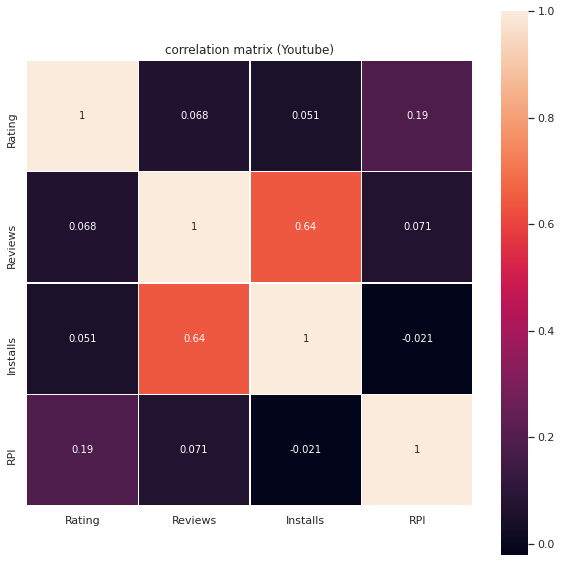

In [ ]:
corrmat_student = apps.corr()

# Heat maps are a great way to get 
# a quick visual read on a big correlation matrix.

plt.figure(figsize=(10,10))

# Draw the heat map using seaborn
sns.heatmap(corrmat_student, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Youtube)")


plt.show()